# OC_P2 Data Cleaning

Bienvenue dans le notebook de nettoyage du projet "Concevez une application au service de la santé publique".

# Sommaire
- <a href="#C1">I. Importation des données</a>
    - 1. Importation des librairies
    - 2. Chargement du dataframe
    - 3. Paramétrage DataViz
    - 4. Affichage et vérification de la forme de nos données
    - 5. Vérification des doublons et valeurs manquantes
    - 6. Choix de variables et création d'un nouveau dataset
- <a href="#C2">II. Nettoyage des données</a>
    - 1. Gestion des valeurs manquantes
    - 2. Transformation variables quantitatives vers variables qualitatives
    - 3. Suppression des outliers
    - 4. Vérifications et sauvegarde du dataset cleané

# <a name="C1">I. Importation et préparation des données</a>

<font size="5">1. Importation des librairies</font>

In [1]:
# importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
pd.options.mode.chained_assignment = None #enlever le warning pour le chained assignment de pandas

<font size="5">2. Chargement du dataframe</font>

In [2]:
# chargement du dataframe
df = pd.read_csv('C:/Users/Oliver/Desktop/fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

<font size="5">3. Paramétrage DataViz</font>

In [3]:
# importation du thème seaborn
sns.set_theme(context='notebook', style='darkgrid', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# upgrade de la résolution des visualisations
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

# set dark background
plt.style.use("dark_background")

<font size="5">4. Affichage et vérification de la forme de nos données</font>

In [4]:
# affichage du dataframe ainsi que de ses dimensions
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font size="5">5. Vérification des doublons et valeurs manquantes</font>

In [5]:
# on regarde si il existe des doublons, il semblerait que non
df.loc[df.duplicated(keep=False),:]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g


In [6]:
# vérification des valeurs manquantes
df.isnull().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

In [7]:
# d'après la cellule précédente, le nombre de valeurs manquantes semble être élevées, nous
# allons créer une fonction pour afficher toutes les valeurs manquantes :

def show_missing(df):   
    variables = []
    count = []
    unique = []
    missing = []
    percent_missing = []
    
    for item in df.columns:
        variables.append(item)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        percent_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'count': count,
        'unique': unique,
        'missing': missing, 
        'percent_missing': percent_missing
    })
    
    return output

In [8]:
# suppression des limites d'affichage colonnes et lignes, afin d'afficher toutes les valeurs
# manquantes de la prochaine cellule
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
# affichage de toutes les valeurs manquantes
show_missing(df)

,variable,count,unique,missing,percent_missing
0,code,320772,320750,23,0.01
1,url,320772,320750,23,0.01
2,creator,320772,3536,2,0.00
3,created_t,320772,189568,3,0.00
4,created_datetime,320772,189569,9,0.00
5,last_modified_t,320772,180495,0,0.00
6,last_modified_datetime,320772,180495,0,0.00
7,product_name,320772,221348,17762,5.54
8,generic_name,320772,38585,267977,83.54
9,quantity,320772,13827,215953,67.32


<font size="5">6. Choix de variables et création d'un nouveau dataset</font><br></br>

Pour ce projet, j'ai fais quelques recherches sur les éléments les plus importants pour
une alimentation saine, j'ai également échangé des experts afin de me renseigner.<br></br>

- Variables Qualitatives
    - code # pour identifier le produit
    - nutriscore FR

- Variables Quantitatives
    - energy-kcal_100g
    - proteins_100g # aide au bon fonctionnement des organes
    - carbohydrates_100g # délivre l'énergie pour l'organisme
    - fiber_100g
    - sodium_100g
    - vitamin-a_100g # tonifie la zone oculaire
    - vitamin-c_100g # renforce le système immunitaire
    - vitamin-d_100g # renforcement général, impliqué dans + de 100 fonctions du corps humain
    - vitamin-e_100g # antioxydant puissant, renforce le système digestif, synergie avec la vitamine C
    - sugars_100g
    - saturated-fat_100g
    - fat_100g
    - additives_n
    - ingredients_from_palm_oil_n
    
Cependant, étant donné que les valeurs manquantes sont élevées, comme on a pu le voir dans la cellule
précedente, on ne pourra pas obtenir toutes les variables désirées, je n'ai donc pas pu récupérer les variables 
pour les vitamines qui en moyenne étaient à 90% manquantes.

J'ai donc limité le choix aux variables contenant en moyenne moins de 30% de valeurs manquantes.

Sources : 
- https://world.openfoodfacts.org/data/data-fields.txt
- https://www.mylifeherbalife.be/fr/articles/sept-elements-essentiels-pour-une-alimentation-equilibree/
- https://www.passeportsante.net/fr/Therapies/Guide/Fiche.aspx?doc=nutrition_th



Maintenant que l'on peux savoir quelle variables sont exploitables, on va pouvoir créer des nouveaux
dataframe qui regrouperont les variables qui nous intérèssent pour le projet.

In [10]:
# création de deux subset, un uniquement quantitatif et un qualitatif fin de les traiter séparement,
# ainsi qu'un troisième pour convertir certains variables quantitatives en qualitatives
df_quali = df[['code','nutrition_grade_fr',]]
df_quanti = df[['nutrition-score-uk_100g','energy_100g','fiber_100g','proteins_100g','carbohydrates_100g','sodium_100g','saturated-fat_100g','fat_100g','sugars_100g']]
df_transform = df[['ingredients_from_palm_oil_n','additives_n']]

# <a name="C2"> II. Nettoyage des données</a>

<font size="5">1. Gestion des valeurs manquantes</font>

In [11]:
# on remplace les valeurs manquantes du nutriscore par les valeurs les plus fréquente / le mode
df_quali['nutrition_grade_fr'] = df_quali['nutrition_grade_fr'].fillna(df_quali['nutrition_grade_fr'].mode()[0])

In [12]:
# on remplace par la médiane les valeurs manquantes des variables quantitatives
medians = df_quanti.median()
df_quanti = df_quanti.fillna(medians)

# même chose pour les variables qualitatives qui seront transformés par la suite
medians_transform = df_transform.median()
df_transform = df_transform.fillna(medians_transform)

<font size="4">Piste annexe : algorithme du voisin le plus proche</font>

In [13]:
# utilisation de l'algorithme KNN pour remplacer les valeurs manquantes du dataset
# par le voisin le plus proche.
# attention, environ 2h de traitement pour cette cellule !
imputer = KNNImputer(n_neighbors=1)
imputed_df = pd.DataFrame(imputer.fit_transform(df_quanti), columns=df_quanti.columns)

In [35]:
# affichage du temps de calcul total pour KNN
%time replace_with_KNN()

CPU times: total: 1h 54min 46s
Wall time: 1h 4min 26s


<font size="4">Note : j'ai laissé tomber cette manipulation car elle prend trop de temps (environ 2heures)</font>

# 2. Transformation variables quantitatives vers variables qualitatives

In [13]:
# on voit que pour les ingrédients à base d'huile de palme, les valeurs vont de 0 à 2
# même chose pour les additifs qui vont de 0 à 31, on va donc créer des sections pour les
# transformer en variables qualitatives
df_transform.describe()

,ingredients_from_palm_oil_n,additives_n
count,320772.000000,320772.000000
mean,0.015257,1.726413
std,0.124065,2.238412
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,2.000000
max,2.000000,31.000000


In [14]:
# transformation des variables avec la fonction .cut(), on précise la nouvelle catégorie avec l'argument
# 'labels' de la fonction
df_transform['ingredients_from_palm_oil_categ'] = pd.cut(df_transform['ingredients_from_palm_oil_n']
,bins=3, labels=['no_palm_oil','medium_palm_oil','high_palm_oil'])

# même chose pour l'autre variable restante
df_transform['additives_categ'] = pd.cut(df_transform['additives_n']
,bins=[0,1,2,5,15,31], labels=["very_low_additives","low_additives","medium_additives","high_additives","very_high_additives"])

In [15]:
# on voit que les valeurs = 0 sont répertoriées comme NaN
df_transform.head()

,ingredients_from_palm_oil_n,additives_n,ingredients_from_palm_oil_categ,additives_categ
0,0.0,1.0,no_palm_oil,very_low_additives
1,0.0,0.0,no_palm_oil,NaN
2,0.0,0.0,no_palm_oil,NaN
3,0.0,0.0,no_palm_oil,NaN
4,0.0,0.0,no_palm_oil,NaN


In [16]:
# pour corriger le tir, on va commencer par changer le type des variables vers un type object

df_transformed = df_transform[['ingredients_from_palm_oil_categ','additives_categ']]

df_transformed['additives_categ'] = df_transformed['additives_categ'].astype(object)
df_transformed['ingredients_from_palm_oil_categ'] = df_transformed['ingredients_from_palm_oil_categ'].astype(object)

In [17]:
# on remplace les valeurs NaN de "additives_categ par "no additives"
df_transformed['additives_categ'].fillna('no_additives',inplace=True)

In [18]:
# vérification
show_missing(df_transformed)

,variable,count,unique,missing,percent_missing
0,ingredients_from_palm_oil_categ,320772,3,0,0.0
1,additives_categ,320772,6,0,0.0


In [19]:
#vérification de la répartition
df_transformed['additives_categ'].value_counts()

very_low_additives     118342
no_additives            94259
medium_additives        49858
low_additives           36520
high_additives          21288
very_high_additives       505
Name: additives_categ, dtype: int64

In [20]:
# on fusionne les 3 dataframes
df_clean = pd.concat([df_quali,df_transformed,df_quanti], axis=1)

In [21]:
# on vérifie que tout est en ordre
df_clean.head(50)

,code,nutrition_grade_fr,ingredients_from_palm_oil_categ,additives_categ,nutrition-score-uk_100g,energy_100g,fiber_100g,proteins_100g,carbohydrates_100g,sodium_100g,saturated-fat_100g,fat_100g,sugars_100g
0,0000000003087,d,no_palm_oil,very_low_additives,9.0,1100.0,1.5,4.76,20.60,0.229,1.79,5.00,5.71
1,0000000004530,d,no_palm_oil,no_additives,14.0,2243.0,3.6,3.57,64.29,0.000,28.57,28.57,14.29
2,0000000004559,b,no_palm_oil,no_additives,0.0,1941.0,7.1,17.86,60.71,0.250,0.00,17.86,17.86
3,0000000016087,d,no_palm_oil,no_additives,12.0,2540.0,7.1,17.86,17.86,0.482,5.36,57.14,3.57
4,0000000016094,d,no_palm_oil,no_additives,9.0,1552.0,5.7,8.57,77.14,0.229,1.79,1.43,5.71
5,0000000016100,d,no_palm_oil,no_additives,9.0,1933.0,7.7,13.46,63.46,0.229,1.92,18.27,11.54
6,0000000016117,d,no_palm_oil,no_additives,9.0,1490.0,1.5,8.89,80.00,0.229,1.79,5.00,5.71
7,0000000016124,c,no_palm_oil,low_additives,7.0,1833.0,9.4,14.06,57.81,0.055,4.69,18.75,15.62
8,0000000016193,d,no_palm_oil,no_additives,9.0,2406.0,7.5,5.00,55.00,0.229,22.50,37.50,42.50
9,0000000016513,d,no_palm_oil,no_additives,9.0,3586.0,1.5,4.76,20.60,0.229,7.14,100.00,5.71


<font size="5">3. Suppression des outliers</font>

In [22]:
# vérification des valeurs aberrantes, on remarque de proteins_100g 
# fiber_100g et sugars_100g, possèdent des valeurs négatives
# nutrition-score-uk_100g possède également des valeurs négatives mais cela est normal car c'est comme
# cela que le score est calculé, un score négatif veux dire que l'aliment est positif.
df_clean.describe()

,nutrition-score-uk_100g,energy_100g,fiber_100g,proteins_100g,carbohydrates_100g,sodium_100g,saturated-fat_100g,fat_100g,sugars_100g
count,320772.000000,3.207720e+05,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000
mean,9.040032,1.134119e+03,2.353033,6.636609,29.313117,0.682801,4.180155,10.877601,13.571051
std,7.626390,5.816820e+03,10.204237,7.623818,26.369085,45.071363,6.945037,15.679270,19.995686
min,-15.000000,0.000000e+00,-6.700000,-800.000000,0.000000,0.000000,0.000000,0.000000,-17.860000
25%,3.000000,5.020000e+02,0.800000,1.600000,9.600000,0.047244,0.300000,0.900000,2.500000
50%,9.000000,1.100000e+03,1.500000,4.760000,20.600000,0.229000,1.790000,5.000000,5.710000
75%,13.000000,1.569000e+03,2.300000,8.240000,49.900000,0.439000,4.500000,14.290000,14.840000
max,40.000000,3.251373e+06,5380.000000,430.000000,2916.670000,25320.000000,550.000000,714.290000,3520.000000


In [23]:
#remplacement des valeurs négatives par 0
df_clean['fiber_100g'] = df_clean['fiber_100g'].apply(lambda x: 0 if x < 0 else x)
df_clean['proteins_100g'] = df_clean['proteins_100g'].apply(lambda x: 0 if x < 0 else x)
df_clean['sugars_100g'] = df_clean['sugars_100g'].apply(lambda x: 0 if x < 0 else x)

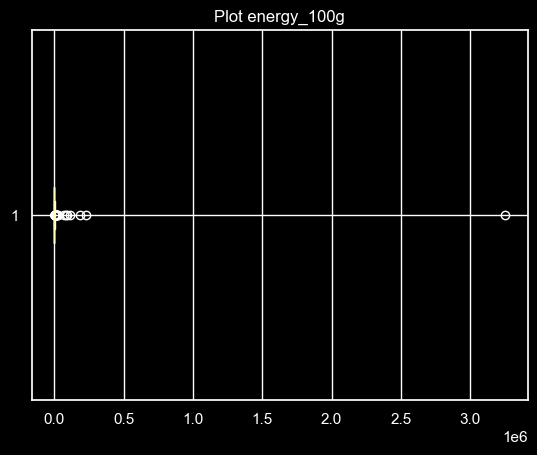

energy_100g


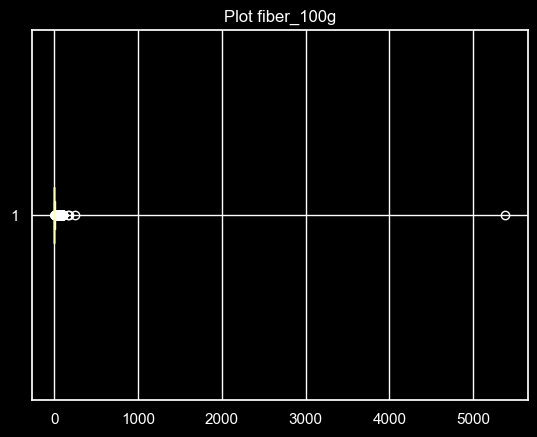

fiber_100g


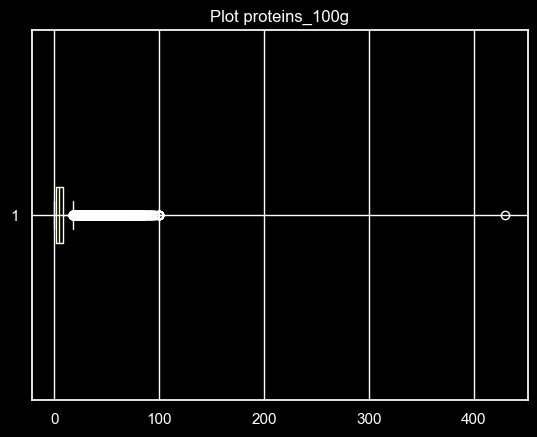

proteins_100g


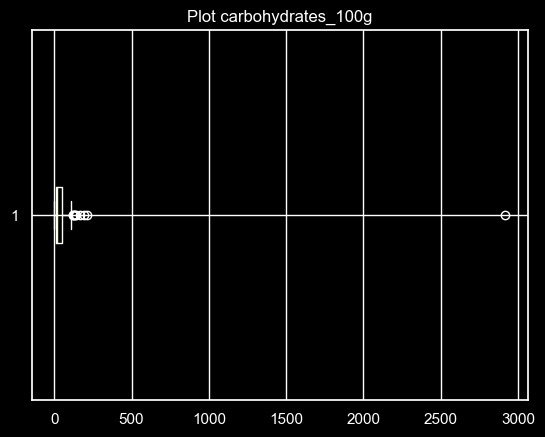

carbohydrates_100g


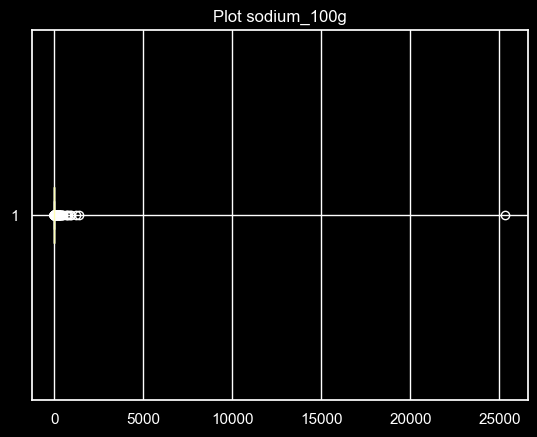

sodium_100g


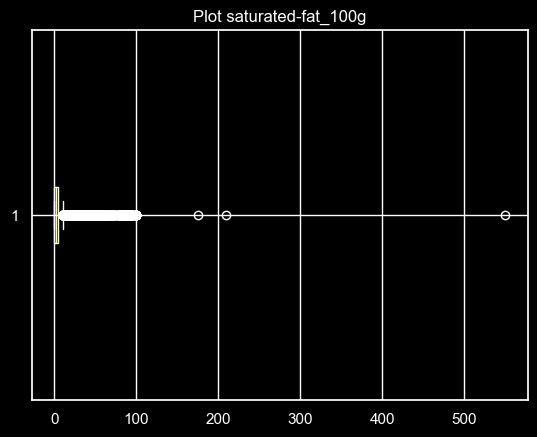

saturated-fat_100g


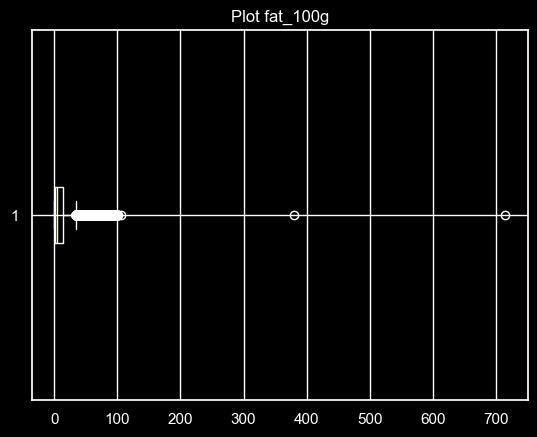

fat_100g


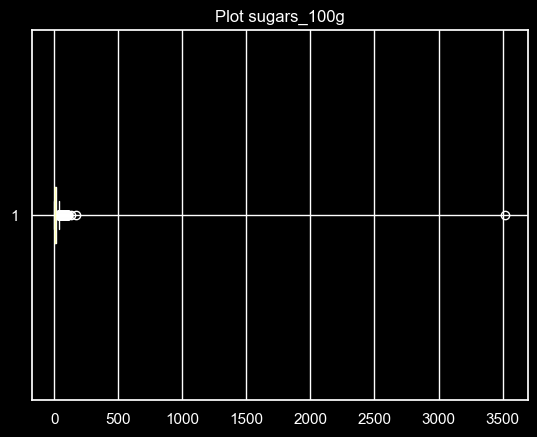

sugars_100g


In [24]:
# on vérifie les outliers
list_columns = ['energy_100g','fiber_100g','proteins_100g','carbohydrates_100g','sodium_100g','saturated-fat_100g','fat_100g','sugars_100g']

for columns_name in list_columns:
    plt.title(f"Plot {columns_name}")
    plt.boxplot(df_clean[columns_name], vert=False)
    plt.show()
    print(columns_name)

In [25]:
#suppression des outliers
df_clean = df_clean[df_clean['energy_100g'] <= 5000]
df_clean = df_clean[df_clean['fiber_100g'] <= 100]
df_clean = df_clean[df_clean['proteins_100g'] <= 100]
df_clean = df_clean[df_clean['carbohydrates_100g'] <= 200]
df_clean = df_clean[df_clean['sodium_100g'] <= 50]
df_clean = df_clean[df_clean['saturated-fat_100g'] <= 100]
df_clean = df_clean[df_clean['fat_100g'] <= 150]
df_clean = df_clean[df_clean['sugars_100g'] <= 500]

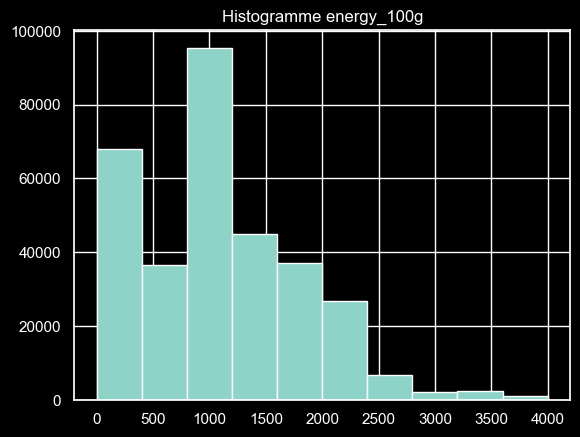

energy_100g


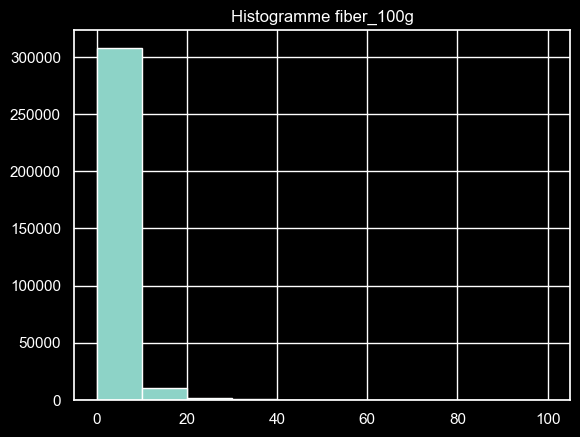

fiber_100g


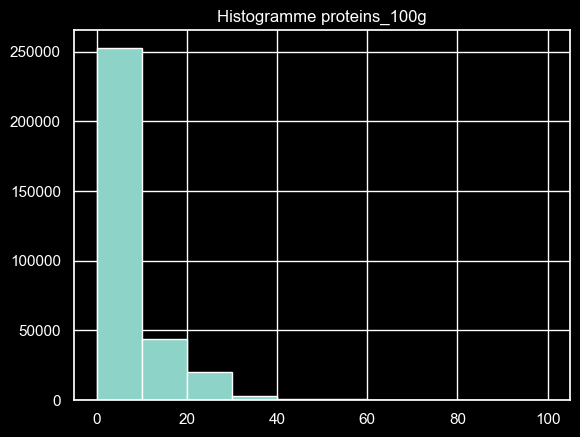

proteins_100g


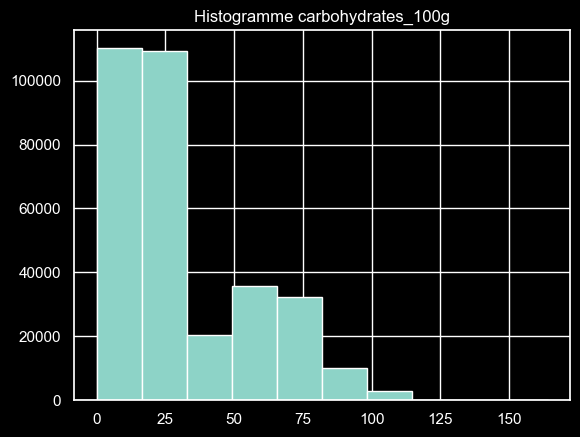

carbohydrates_100g


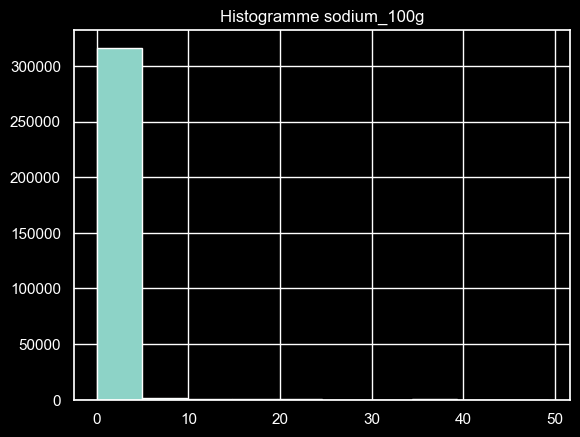

sodium_100g


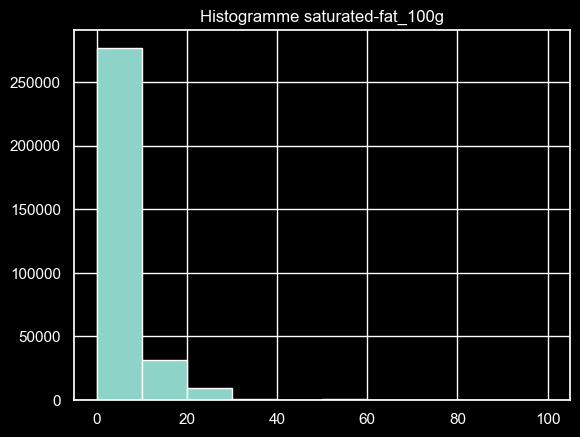

saturated-fat_100g


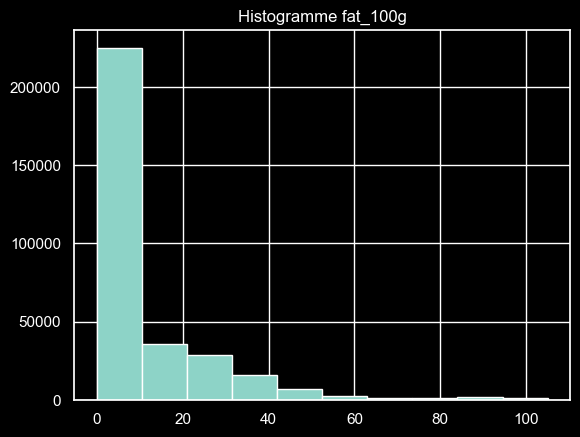

fat_100g


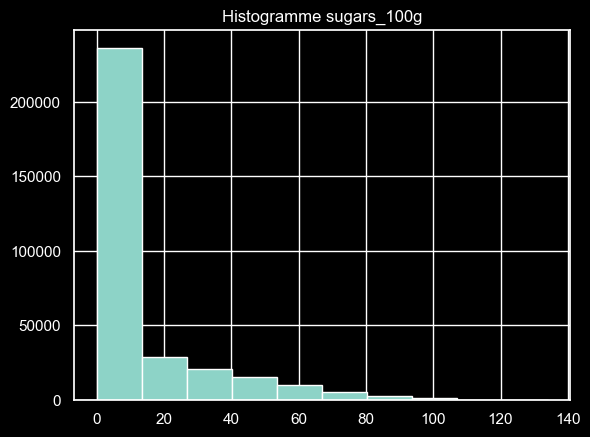

sugars_100g


In [26]:
# on vérifie que la distribution des variables est correcte
list_columns = ['energy_100g','fiber_100g','proteins_100g','carbohydrates_100g','sodium_100g','saturated-fat_100g','fat_100g','sugars_100g']

for columns_name in list_columns:
    plt.title(f"Histogramme {columns_name}")
    plt.hist(df_clean[columns_name])
    plt.show()
    print(columns_name)

In [27]:
# vérification de perte de donnée
df_clean.shape

(320564, 13)

In [28]:
show_missing(df_clean)

,variable,count,unique,missing,percent_missing
0,code,320564,320542,23,0.01
1,nutrition_grade_fr,320564,5,0,0.00
2,ingredients_from_palm_oil_categ,320564,3,0,0.00
3,additives_categ,320564,6,0,0.00
4,nutrition-score-uk_100g,320564,38,0,0.00
5,energy_100g,320564,3879,0,0.00
6,fiber_100g,320564,1010,0,0.00
7,proteins_100g,320564,2497,0,0.00
8,carbohydrates_100g,320564,5413,0,0.00
9,sodium_100g,320564,5245,0,0.00


In [29]:
# on supprime les valeurs manquantes pour la variable "code"
# étant donner que ces variables sont unique et ne peuvent pas être calculées
df_clean.dropna(subset=['code'], inplace=True)

<font size="5">4. Vérifications et sauvegarde du dataset cleané</font>

In [30]:
# vérification doublons, visiblement il n'y en a pas
df_clean.loc[df_clean.duplicated(keep=False),:]

,code,nutrition_grade_fr,ingredients_from_palm_oil_categ,additives_categ,nutrition-score-uk_100g,energy_100g,fiber_100g,proteins_100g,carbohydrates_100g,sodium_100g,saturated-fat_100g,fat_100g,sugars_100g


In [31]:
#vérification valeurs manquantes, tout semble bon
df_clean.isnull().sum()

code                               0
nutrition_grade_fr                 0
ingredients_from_palm_oil_categ    0
additives_categ                    0
nutrition-score-uk_100g            0
energy_100g                        0
fiber_100g                         0
proteins_100g                      0
carbohydrates_100g                 0
sodium_100g                        0
saturated-fat_100g                 0
fat_100g                           0
sugars_100g                        0
dtype: int64

In [32]:
# vérification types
df_clean.dtypes

code                                object
nutrition_grade_fr                  object
ingredients_from_palm_oil_categ     object
additives_categ                     object
nutrition-score-uk_100g            float64
energy_100g                        float64
fiber_100g                         float64
proteins_100g                      float64
carbohydrates_100g                 float64
sodium_100g                        float64
saturated-fat_100g                 float64
fat_100g                           float64
sugars_100g                        float64
dtype: object

In [33]:
# on a perdu à peu près 200 lignes par rapport au dataframe de base
df_clean.shape

(320541, 13)

In [34]:
# sauvegarde du dataframe cleané dans un nouveau fichier
df_clean.to_csv('food_cleaned_final.csv', index=False)